<a href="https://colab.research.google.com/github/annabocharovaua/Time-Series-Analysis-Forecasting-and-Machine-Learning/blob/main/ARIMA_Amadeus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install -U statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
!wget -nc https://lazyprogrammer.me/course_files/airline_passengers.csv 

File ‘airline_passengers.csv’ already there; not retrieving.



In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv('airline_passengers.csv', index_col='Month', parse_dates=True, delimiter=';')

In [10]:
df.head()

,Passengers
Month,
2011-01-01,112000
2011-02-01,118000
2011-03-01,132000
2011-04-01,129000
2011-05-01,121000


<Axes: xlabel='Month'>

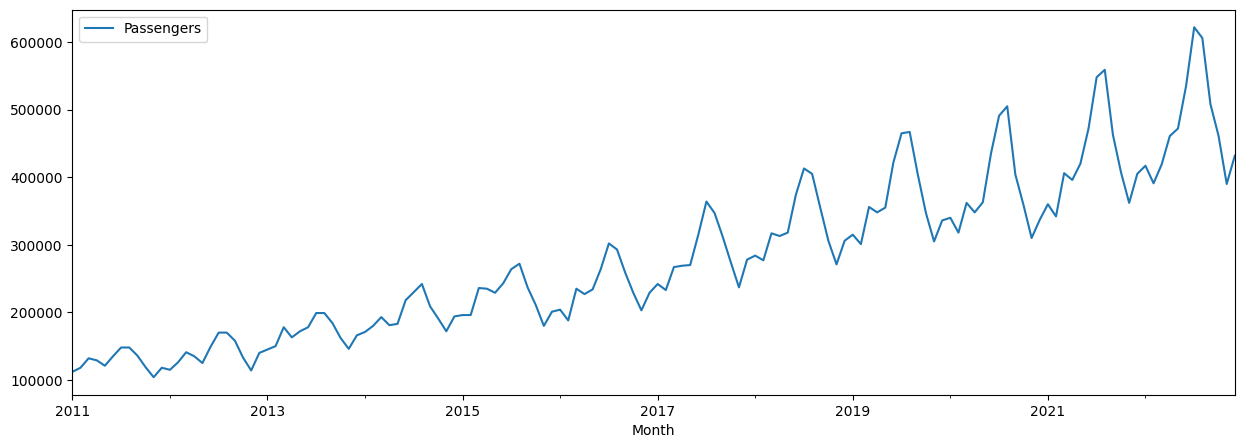

In [11]:
df.plot(figsize=(15,5))

In [12]:
df['lstdiff'] = df['Passengers'].diff()

<Axes: xlabel='Month'>

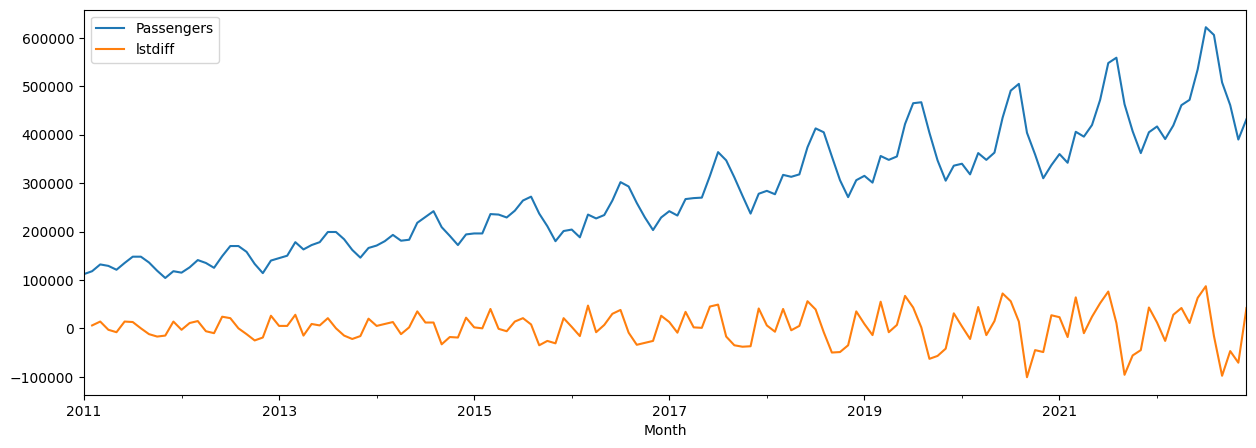

In [13]:
df.plot(figsize=(15,5))

In [14]:
df['LogPassengers'] = np.log(df['Passengers'])

<Axes: xlabel='Month'>

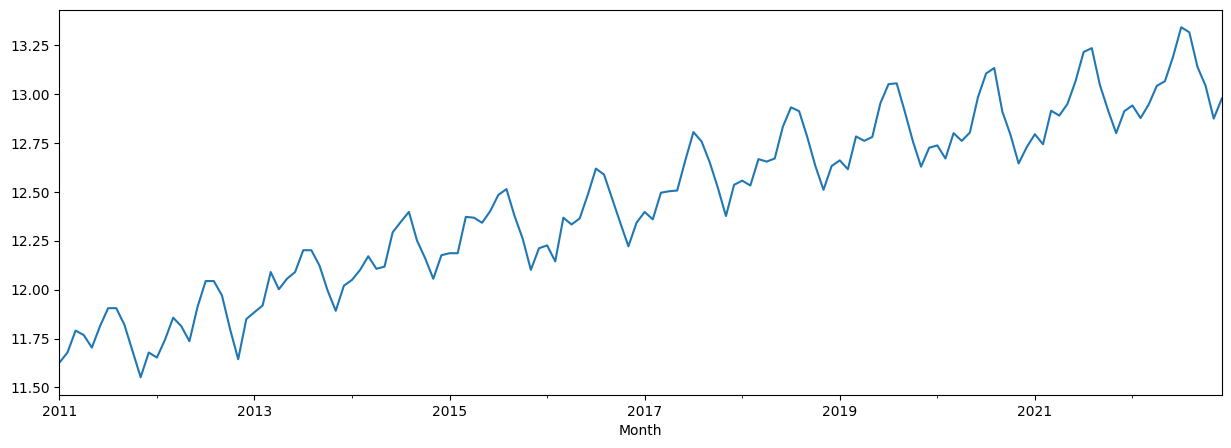

In [15]:
df['LogPassengers'].plot(figsize=(15,5))

In [16]:
from statsmodels.tsa.arima.model import ARIMA

In [17]:
df.index.freq='MS'

In [18]:
Ntest = 12
train = df.iloc[:-Ntest]
test = df.iloc[-Ntest:]

In [19]:
train_idx = df.index <= train.index[-1]
test_idx = df.index > train.index[-1]

In [20]:
arima = ARIMA(train['Passengers'], order=(1,0,0))

In [21]:
arima_result = arima.fit()

In [22]:
df.loc[train_idx, 'AR(1)'] = arima_result.predict(
    start = train.index[0], end = train.index[-1])

<Axes: xlabel='Month'>

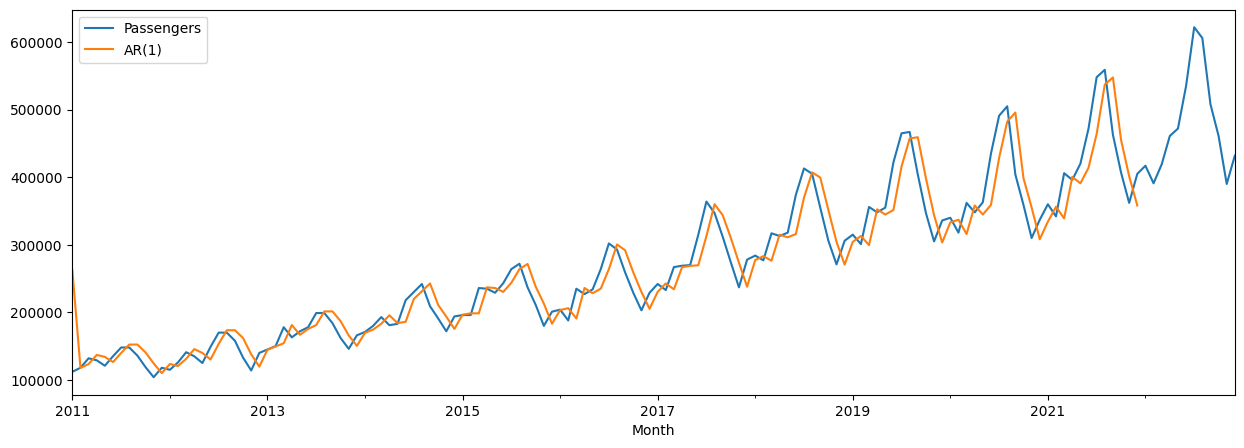

In [23]:
df[['Passengers', 'AR(1)']].plot(figsize=(15,5))

In [24]:
prediction_result = arima_result.get_forecast(Ntest)
forecast = prediction_result.predicted_mean
df.loc[test_idx, 'AR(1)'] = forecast

In [25]:
#Explore prediction result further
type(prediction_result)

statsmodels.tsa.statespace.mlemodel.PredictionResultsWrapper

In [26]:
#Confidence interval 
prediction_result.conf_int()

,lower Passengers,upper Passengers
2022-01-01,338855.925914,460274.285290
2022-02-01,310102.993620,478571.976252
2022-03-01,288066.121711,490552.344456
2022-04-01,269717.147641,499228.345559
2022-05-01,253847.898511,505793.525524
2022-06-01,239819.663723,510872.525851
2022-07-01,227241.031726,514843.225552
2022-08-01,215848.800823,517955.809886
2022-09-01,205454.273346,520386.456496
2022-10-01,195915.677588,522264.894550


In [27]:
def plot_fit_and_forecast(result): 
  fig, ax = plt.subplots(figsize = (15,5))
  ax.plot(df['Passengers'], label = 'data')

  #plot the curve fitted on train set
  train_pred = result.fittedvalues
  ax.plot(train.index, train_pred, color='green', label='fitted')

  #forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int['lower Passengers'], conf_int['upper Passengers']
  forecast = prediction_result.predicted_mean
  ax.plot(test.index, forecast, label='forecast')
  ax.fill_between(test.index, \
                  lower, upper, \
                  color = 'red', alpha=0.3)
  ax.legend()

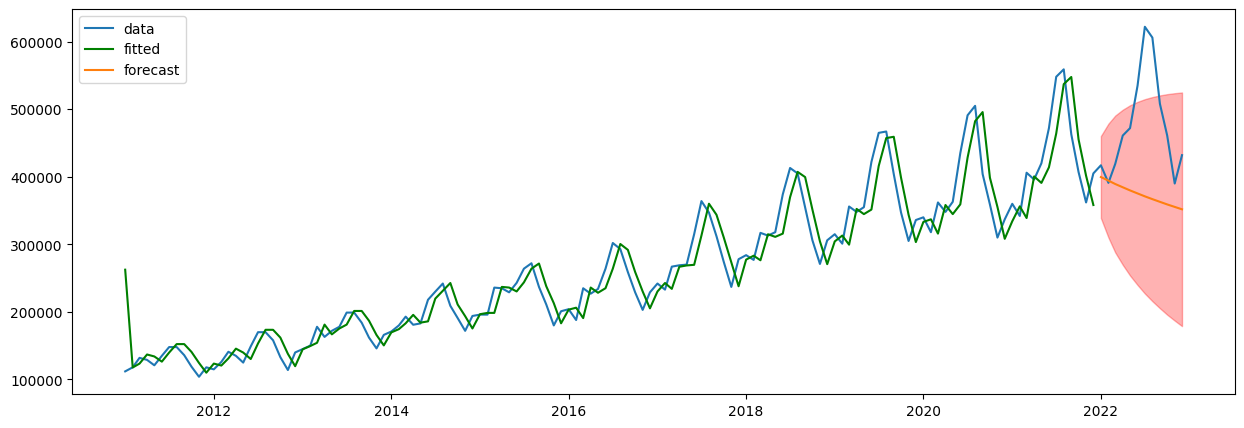

In [28]:
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


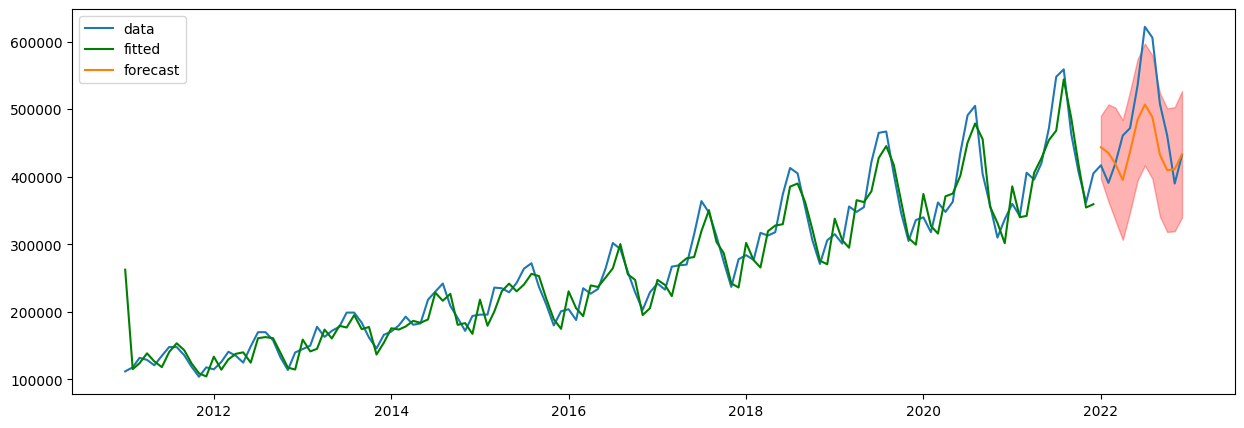

In [29]:
arima = ARIMA(train['Passengers'], order=(10,0,0)) #AR(10)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


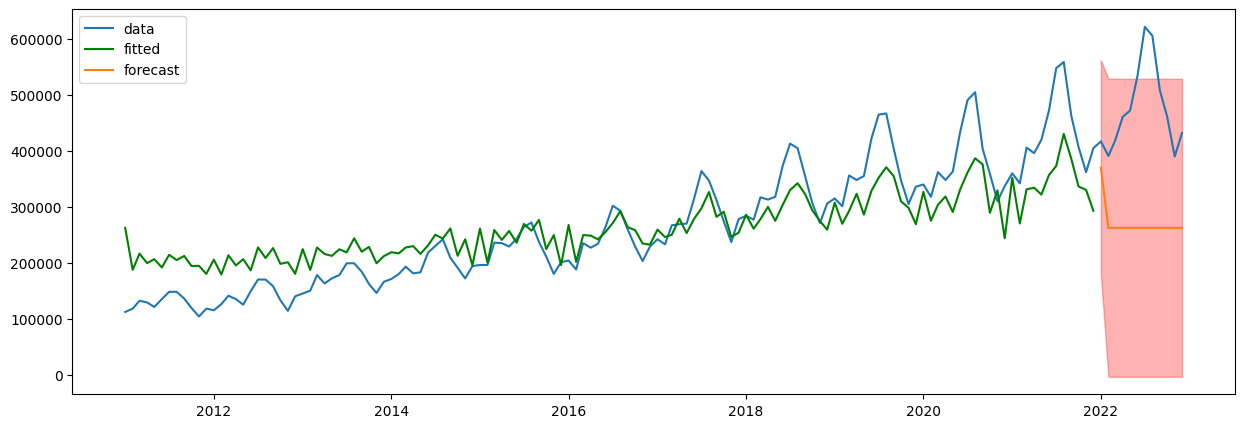

In [30]:
arima = ARIMA(train['Passengers'], order=(0,0,1)) #MA(1)
arima_result = arima.fit()
plot_fit_and_forecast(arima_result)

In [31]:
df['LogIstDiff'] = df['LogPassengers'].diff()

<Axes: xlabel='Month'>

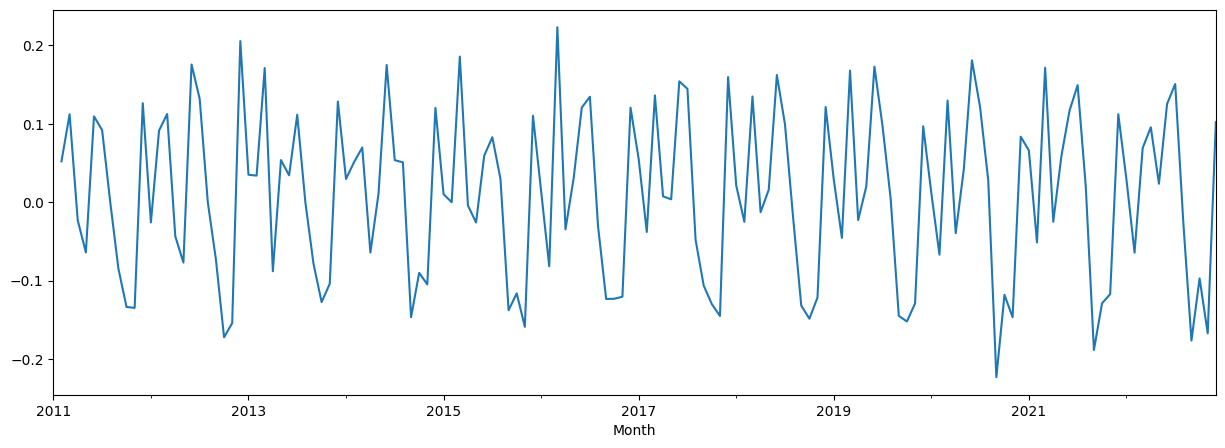

In [32]:
df['LogIstDiff'].plot(figsize = (15, 5))

In [69]:
arima = ARIMA(train['Passengers'], order = (12,1,0))
arima_result_1210 = arima.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [70]:
def plot_fit_and_forecast_int(result, d, col='Passengers'): 
  fig, ax = plt.subplots(figsize = (15,5))
  ax.plot(df[col], label = 'data')

  #plot the curve fitted on train set
  train_pred = result.predict(start = train.index[d], end = train.index[-1])

  ax.plot(train.index[d:], train_pred, color='green', label='fitted')

  #forecast the test set
  prediction_result = result.get_forecast(Ntest)
  conf_int = prediction_result.conf_int()
  lower, upper = conf_int[f'lower {col}'], conf_int[f'upper {col}']
  forecast = prediction_result.predicted_mean
  #ax.plot(test.index, forecast, label='forecast')
  ax.plot(df.loc[test_idx].index, forecast, label='forecast')  #  test.index на df.loc[test_idx].index
  ax.fill_between(df.loc[test_idx].index, lower, upper, color='red', alpha=0.3)  # test.index на df.loc[test_idx].index
  ax.legend()

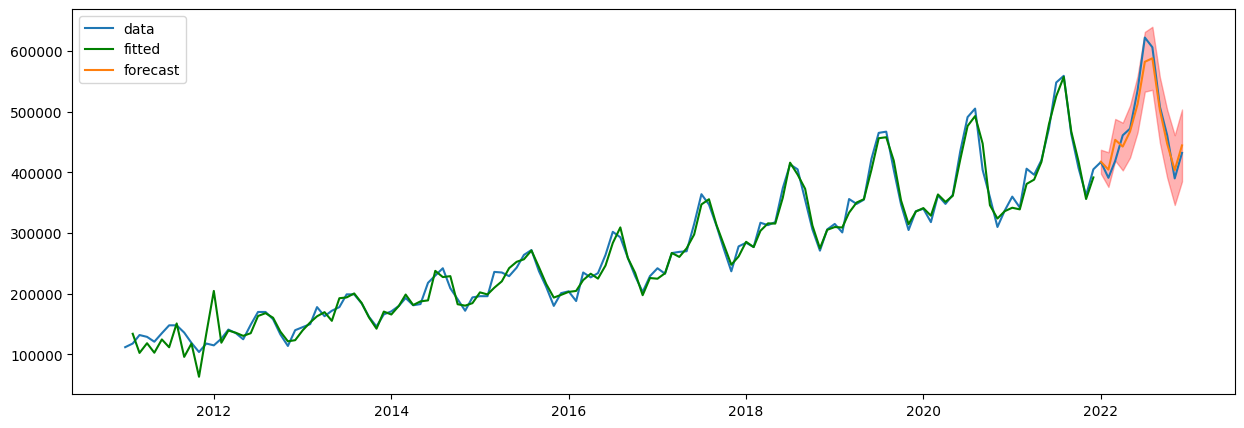

In [71]:
plot_fit_and_forecast_int(arima_result_1210, 1)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


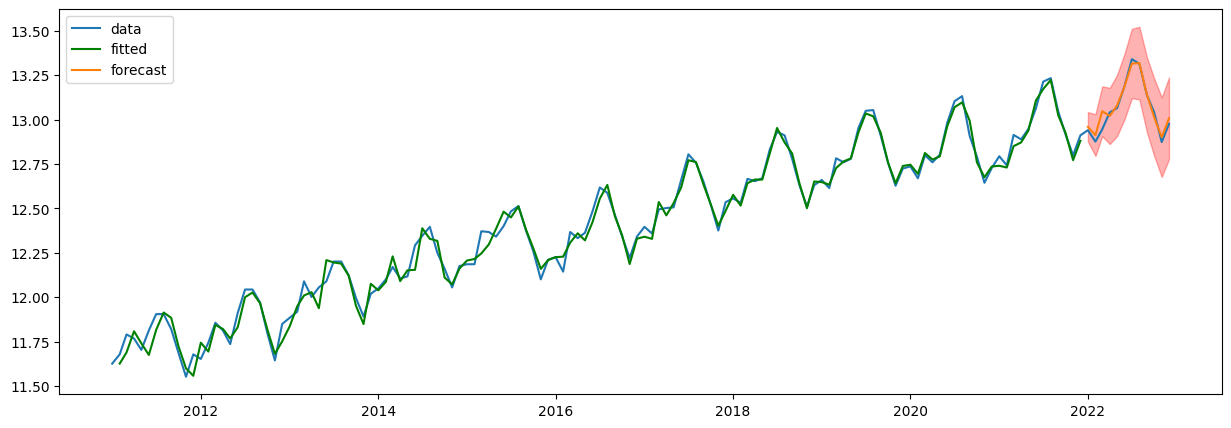

In [72]:
arima = ARIMA(train['LogPassengers'], order=(12,1,0)) 
arima_result_log1210 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1210, 1 , col='LogPassengers')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


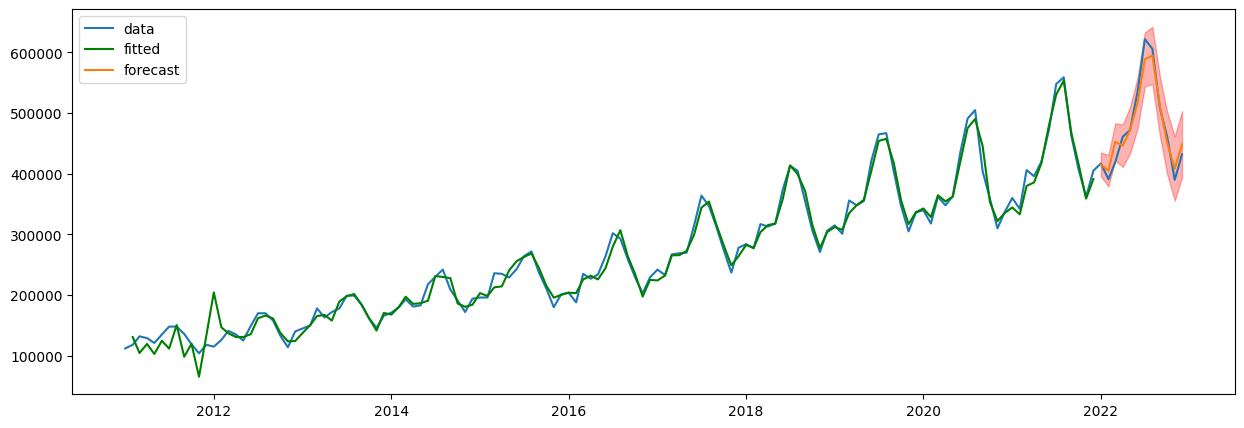

In [65]:
arima = ARIMA(train['Passengers'], order=(12,1,2)) 
arima_result_1212 = arima.fit()
plot_fit_and_forecast_int(arima_result_1212, 1 , col='Passengers')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


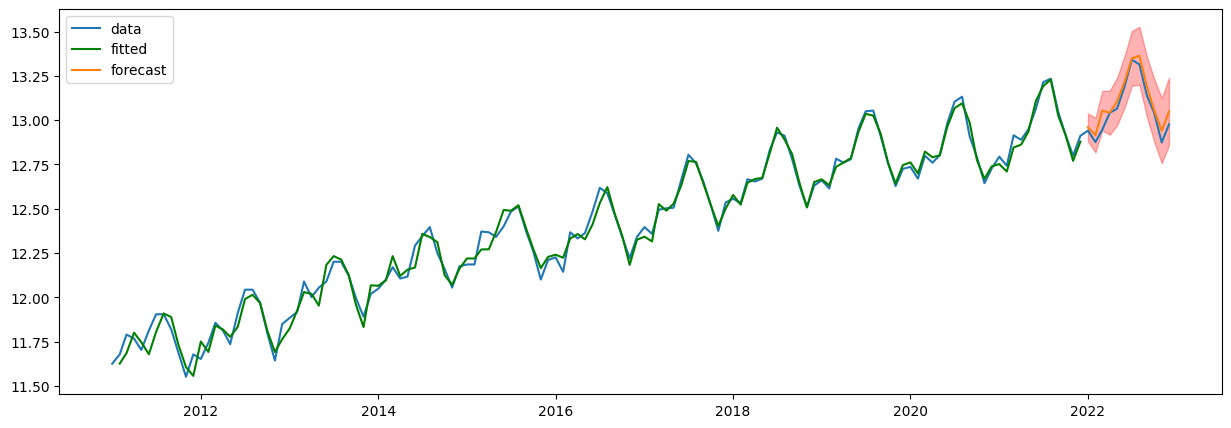

In [67]:
arima = ARIMA(train['LogPassengers'], order=(12,1,2)) 
arima_result_log1212 = arima.fit()
plot_fit_and_forecast_int(arima_result_log1212, 1 , col='LogPassengers')

In [39]:
def rmse(result, is_logged):
  forecast = result.forecast(Ntest)
  if is_logged: 
    forecast = np.exp(forecast)
  
  t = test['Passengers']
  y = forecast
  return np.sqrt(np.mean((t-y)**2))

In [75]:
print ("ARIMA(12, 1, 0):", rmse(arima_result_1210, False))
print ("ARIMA(12, 1, 2):", rmse(arima_result_1212, False))


ARIMA(12, 1, 0): 19877.055629991522
ARIMA(12, 1, 2): 17929.670139555386


In [76]:
print ("ARIMA(12, 1, 0) logged:", rmse(arima_result_log1210, True))
print ("ARIMA(12, 1, 2) logged:", rmse(arima_result_log1212, True))


ARIMA(12, 1, 0) logged: 16118.063691960859
ARIMA(12, 1, 2) logged: 23423.946754484474
